<a href="https://colab.research.google.com/github/apaz304/AI_with_Python/blob/main/Chapters/Chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM in python

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
datapath = "/content/drive/MyDrive/Metropolia_AI_Python/Data_demos/"
df2 = pd.read_csv(datapath + "iris.csv")
print(df2.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [ ]:
X = df2.drop('variety', axis=1)
y = df2['variety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=20)

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       0.92      1.00      0.96        11
   Virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
svclassifier = SVC(kernel='poly', degree=2)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       1.00      1.00      1.00        11
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       1.00      1.00      1.00        11
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(datapath + 'weight-height.csv',skiprows=0,delimiter=",")
X = 2.54*df[['Height']]

In [ ]:
X_mm = MinMaxScaler().fit_transform(X)
X_std = StandardScaler().fit_transform(X)

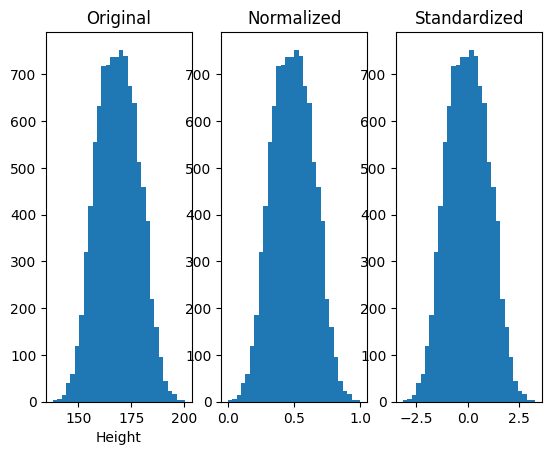

In [ ]:
X = np.array(X)
X_mm = np.array(X_mm)
X_std = np.array(X_std)

plt.subplot(1,3,1)
plt.hist(X,30)
plt.xlabel("Height")
plt.title("Original")
plt.subplot(1,3,2)
plt.hist(X_mm,30)
plt.title("Normalized")
plt.subplot(1,3,3)
plt.hist(X_std,30)
plt.title("Standardized")
plt.show()

In [ ]:
X_mm2 = (X-np.min(X))/(np.max(X)-np.min(X))
print("diff=",np.max(np.abs(X_mm-X_mm2)))

X_std2 = (X-np.mean(X))/np.std(X)
print("diff2=",np.max(np.abs(X_std-X_std2)))

diff= 3.3306690738754696e-16
diff2= 0.0


# Effect of feature scaling in machine learning

In [ ]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(datapath+'Admission_Predict.csv',skiprows=0,delimiter=",")
#print(df)
X = df[["CGPA",'GRE Score']]
y = df[["Chance of Admit "]]
print(X)
print(y)

     CGPA  GRE Score
0    9.65        337
1    8.87        324
2    8.00        316
3    8.67        322
4    8.21        314
..    ...        ...
395  9.04        324
396  9.11        325
397  9.45        330
398  8.78        312
399  9.66        333

[400 rows x 2 columns]
     Chance of Admit 
0                0.92
1                0.76
2                0.72
3                0.80
4                0.65
..                ...
395              0.82
396              0.84
397              0.91
398              0.67
399              0.95

[400 rows x 1 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
#print(X_train_norm)
#print(X_test_norm)
#print(X_train_std)
#print(X_test_std)

In [ ]:
lm = neighbors.KNeighborsRegressor(n_neighbors=5)
lm.fit(X_train, y_train)
predictions = lm.predict(X_test) # Not needed here
print("R2 =",lm.score(X_test,y_test))

lm.fit(X_train_norm, y_train)
#predictions2 = lm.predict(X_test_norm)
print("R2 (norm) =",lm.score(X_test_norm,y_test))

lm.fit(X_train_std, y_train)
#predictions3 = lm.predict(X_test_std)
print("R2 (std) =",lm.score(X_test_std,y_test))

R2 = 0.7509928259756933
R2 (norm) = 0.7523599677299028
R2 (std) = 0.8090489285228912


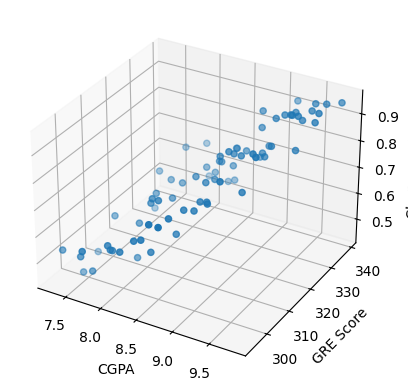

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(X_test[['CGPA']]),np.array(X_test[['GRE Score']]),predictions)
ax.set_xlabel('CGPA')
ax.set_ylabel('GRE Score')
ax.set_zlabel('Chance of Admit')
plt.show()

# Decision trees in python

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import graphviz

datapath = "/content/drive/MyDrive/Metropolia_AI_Python/Data_demos/"
df = pd.read_csv(datapath+"data_banknote_authentication.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [ ]:
X = df.drop('class', axis=1)
y = df['class']
print(X)
print(y)

      variance  skewness  curtosis  entropy
0      3.62160   8.66610   -2.8073 -0.44699
1      4.54590   8.16740   -2.4586 -1.46210
2      3.86600  -2.63830    1.9242  0.10645
3      3.45660   9.52280   -4.0112 -3.59440
4      0.32924  -4.45520    4.5718 -0.98880
...        ...       ...       ...      ...
1367   0.40614   1.34920   -1.4501 -0.55949
1368  -1.38870  -4.87730    6.4774  0.34179
1369  -3.75030 -13.45860   17.5932 -2.77710
1370  -3.56370  -8.38270   12.3930 -1.28230
1371  -2.54190  -0.65804    2.6842  1.19520

[1372 rows x 4 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=11)

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[160   4]
 [  0 111]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       164
           1       0.97      1.00      0.98       111

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.98       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
            feature_names = X_train.columns,
            filled = True, rounded = True,special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("dtree")

'dtree.pdf'

In [ ]:
classifier = DecisionTreeClassifier(criterion="entropy",max_depth=4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[157   7]
 [  4 107]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       164
           1       0.94      0.96      0.95       111

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
            feature_names = X_train.columns,
            filled = True, rounded = True,special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("dtree2")

'dtree2.pdf'

# Text data preparation, email spam classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
text = ["The quick brown fox jumped over the lazy dog."]
vectorizer = CountVectorizer()
vectorizer.fit(text) # create a vocabulary from text input

print("vocab=",vectorizer.vocabulary_)
vector = vectorizer.transform(text)
print(vector.shape)
print(vector.toarray())

vocab= {'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
[[1 1 1 1 1 1 1 2]]


In [ ]:
vector = vectorizer.transform(["the brown fox and big puppy"])
print(vector.shape)
print(vector.toarray())

(1, 8)
[[1 0 1 0 0 0 0 1]]


In [ ]:
vector = vectorizer.transform(["the brown fox","lazy dog jumped"])
print(vector.shape)
print(vector.toarray())

(2, 8)
[[1 0 1 0 0 0 0 1]
 [0 1 0 1 1 0 0 0]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv(datapath + "emails.csv")
print(df.head())

print(df.spam.value_counts())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
spam
0    4360
1    1368
Name: count, dtype: int64


In [ ]:
X = df["text"]
y = df["spam"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)
print(X_test)
print(y_test)

2507    Subject: tentative schedule of the talks at si...
3886    Subject: re : thanks !  karin ,  i talked to m...
3330    Subject: approval for restricted websit : web ...
5613    Subject: re : full version  i read the chapter...
2357    Subject: spreadsheet for george posey  vince a...
                              ...                        
1642    Subject: christie and vince :  on behalf of en...
2255    Subject: e & p company model  mark ,  did you ...
753     Subject: affordable - the way medications shou...
2263                          Subject: elena chilkina  hi
282     Subject: prime lenders application status  we ...
Name: text, Length: 1146, dtype: object
2507    0
3886    0
3330    0
5613    0
2357    0
       ..
1642    0
2255    0
753     1
2263    0
282     1
Name: spam, Length: 1146, dtype: int64


In [ ]:
vect = CountVectorizer(stop_words="english")
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)
model = svm.SVC()
model.fit(X_train_df,y_train)
y_pred = model.predict(X_test_df)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names=["not spam","spam"]))

0
[[859   2]
 [ 24 261]]
              precision    recall  f1-score   support

    not spam       0.97      1.00      0.99       861
        spam       0.99      0.92      0.95       285

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146



In [ ]:
y_test2 = np.array(y_test)
y_pred2 = np.array(y_pred)

idx = np.logical_and(y_pred2 == 0, y_test2 == 0)
spam0 = X_test[idx]
print("Not spam: ",np.array(spam0.index))
print("Not spam sample =",X_test[3886])
print("Not spam sample =",X_test[5613])

idx = np.logical_and(y_pred2 == 1, y_test2 == 1)
spam = X_test[idx]
print("spam: ",np.array(spam.index))
print("spam sample =",X_test[282])
print("spam sample =",X_test[225])

Not spam:  [2507 3886 3330 5613 2357 5547 3169 3471 1858 4788 3643 3539 5460 2943
 3328 5032 3147 2637 1710 5443 2310 5466 2813 4156 5141 1521 2863 2961
 2484 3038 4368 1598 4607 3637 2492 5591 3399 3758 3035 5652 4629 5474
 3670 2329 3977 1429 3205 4151 2722 4718 5521 3908 5693 3295 5045 3905
 4227 3121 1899 1563 3561 3459 4762 5595 4549 4831 4006 4418 2569 5001
 3962 5026 5284 2224 3774 1622 2716 1486 4489 3563 4135 4744 5073 4106
 2178 1510 1492 1413 4340 5290 3283 2709 5038 3248 3916 5556 2309 1528
 5077 3805 5059 5705 3186 4828 5100 4386 4552 1773 3347 4494 4478 3880
 3130 1874 4943 4326 4935 2897 2473 5179 4408 3304 4427 3752 4591 3769
 3777 3982 1634 5004 2497 3723 4189 5436 3357 4152 3233 4415 2020 4915
 2214 3581 5467 2397 3297 2393 4647 3852 5583 2173 4221 4564 3476 2136
 5003 2970 5464 1796 1766 4067 5692 1735 1729 3853 5544 5684 5355 1437
 4343 2779 4298 3829 3114 3759 4339 3760 3060 5171 4020 2108 4114 5212
 3043 1412 2820 4270 3607 3698 1446 3809 4479 1628 1484 3264 2367 